#  <font>Lead Score Case Study</font>

### <font color = 'brown' size = 4 >Problem Statment</font>
<font>An education company named X Education sells online courses to industry professionals. Through marketing and past referrals, X education acquires the information of leads, i.e. people who are interested in a particular course.<br>
The aim of this case study is to identify 'hot leads' - those leads that are most likely to convert into paying customers, so that X education can target these promising leads to ensure a high conversion rate.  </font>

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing libraries for model building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

# Importing libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Modifying settings to ensure that all the required rows and columns are displayed
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Step 1: Reading and Understanding the Data

In [3]:
# Reading the dataframe
Leads_df = pd.read_csv("Leads.csv")

In [4]:
# Check the head of the dataframe
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
Leads_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [6]:
# Checking the shape of dataframe
Leads_df.shape

(9240, 37)

In [7]:
Leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Checking the non-null counts of dataframe
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Observations:**
- We can see that the datatypes are consistent with the values stored in the columns. Therefore, we do not need to convert data types.

## Step 2: Cleaning Data

While inspecting the data, we observed that many columns have the value 'Select'. This implies that the value has not been populated. Therefore, we will replace all occurences of 'Select' with np.nan

In [9]:
# Replacing the 'Select' values with np.nan
Leads_df.replace(to_replace='Select', value=np.nan, inplace=True)

In [10]:
# Creating a dataframe with null counts of columns
null_df=Leads_df.isnull().sum()
null_df=null_df.reset_index()
null_df.columns=['Column Name','Null Counts']

# Creating a dataframe with the null percentages
percentage=pd.DataFrame(round(100*Leads_df.isnull().sum()/Leads_df.shape[0],2)).reset_index()
percentage.columns=['Column Name','Null Percentages']

# Mergeing the two dataframes
null_df=pd.merge(null_df,percentage, on='Column Name')
null_df=null_df.sort_values('Null Percentages', ascending=False)

In [11]:
# Displaying the columns having null percentage greater than 0
null_df[null_df['Null Percentages']>0]

,Column Name,Null Counts,Null Percentages
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


### 2.1: Handling columns having null values greater than 40%

In [12]:
# Display the columns with more than 40% null values
high_null_cols=null_df[null_df['Null Percentages']>40]['Column Name']
high_null_cols

13    How did you hear about X Education
28                          Lead Profile
25                          Lead Quality
33            Asymmetrique Profile Score
32           Asymmetrique Activity Score
30           Asymmetrique Activity Index
31            Asymmetrique Profile Index
Name: Column Name, dtype: object

- Since the null percentage is very high (more than 40%), we will be dropping these columns.

In [13]:
# Displaying the number of columns present in dataframe before dropping
print('Count of columns present in dataframe before dropping: ',Leads_df.shape[1])

# Dropping the columns with high null percentage
Leads_df.drop(high_null_cols,axis=1, inplace=True)

# Displaying the number of columns present in dataframe after dropping
print('Count of columns present in dataframe after dropping: ',Leads_df.shape[1])

Count of columns present in dataframe before dropping:  37
Count of columns present in dataframe after dropping:  30


### 2.2: Handling columns having null values less than 40%

In [14]:
# Displaying the columns having null percentage between 40 and 0
nullperc_cols=null_df[(null_df['Null Percentages']<40) & (null_df['Null Percentages']>0)]['Column Name']
nullperc_cols

29                                             City
12                                   Specialization
24                                             Tags
15    What matters most to you in choosing a course
14                  What is your current occupation
11                                          Country
9                              Page Views Per Visit
7                                       TotalVisits
10                                    Last Activity
3                                       Lead Source
Name: Column Name, dtype: object

**Observations:**
- The 'Tags' column will be populated after making the call to the lead.
- Since the aim of this case study is to identify the leads to call them, this data will not be available beforehand.
- Therefore we will be dropping this column

In [15]:
# Dropping the Tags column
Leads_df.drop(['Tags'],inplace=True,axis=1)

#### 2.2.1: Handling the null values in the column - 'What matters most to you in choosing a course'

In [16]:
# Checking the different values in the column and their percentage composition
Leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [17]:
# Displaying the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='What matters most to you in choosing a course')]

,Column Name,Null Counts,Null Percentages
15,What matters most to you in choosing a course,2709,29.32


**Observations**
- 99% of the not null data in column belongs to one category. 
- Almost 30% of the values are null. Even if we impute the null values with the most frequent value, the data would still be highly skewed.
- There isn't enough variation to use this column in the model.
- Hence, we will be dropping this column.

In [18]:
# Dropping the column
Leads_df.drop('What matters most to you in choosing a course',inplace=True,axis=1)

#### 2.2.2: Handling the null values in the column - 'What is your current occupation'

In [19]:
# Checking the different values in the column and their composition
Leads_df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [20]:
# Checking the value counts
Leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
# Checking the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='What is your current occupation')]

,Column Name,Null Counts,Null Percentages
14,What is your current occupation,2690,29.11


**Observations:**
- This column has almost 30% null values. 
- Assuming that these users are unemployed(most frequent value) will not be ideal.
- Hence, we will impute the null values with 'Unknown'

In [22]:
# Imputing the missing values with 'Unknown'
Leads_df['What is your current occupation'].fillna('Unknown',inplace=True)

#### 2.2.3: Handling the null values in the column - 'Country'

In [23]:
# Checking the different values in the column and their percentage composition
Leads_df['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
South Africa             0.059006
Canada                   0.059006
Nigeria                  0.059006
Kuwait                   0.059006
Germany                  0.059006
Sweden                   0.044254
Uganda                   0.029503
Philippines              0.029503
Ghana                    0.029503
Italy                    0.029503
Belgium                  0.029503
China                    0.029503
Asia/Pacific Region      0.029503
Netherlands              0.029503
Bangladesh               0.029503
Indonesia                0.014751
Tanzania      

In [24]:
# Checking the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='Country')]

,Column Name,Null Counts,Null Percentages
11,Country,2461,26.63


**Observation:**
- 95% of the not null data in column belongs to one country - 'India'. 
- 26% of the values are null. Even if we impute the null values with the most frequent value the data would still be highly skewed.
- There is not enough variation to use this column in the model.
- Hence, we will be dropping this column.

In [25]:
# Dropping the column
Leads_df.drop('Country',inplace=True,axis=1)

In [26]:
# Checking the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='How did you hear about X Education')]

,Column Name,Null Counts,Null Percentages
13,How did you hear about X Education,7250,78.46


#### 2.2.4: Handling the null values in the column - 'Specialization'

In [27]:
# Checking the different values in the column and their percentage composition
Leads_df['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [28]:
# Checking the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='Specialization')]

,Column Name,Null Counts,Null Percentages
12,Specialization,3380,36.58


**Observations:**
- Missing values in the Specialization column could mean that the user has not yet picked a specialization or that the user forgot to fill this.
- Therefore, we will be replacing all the missing values with 'Unknown'

In [29]:
# Imputing nulls in the column with 'Unknown'
Leads_df['Specialization'].fillna('Unknown', inplace = True)

In [30]:
# Checking the value counts after imputation
Leads_df['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### 2.2.5: Handling the null values in the column - 'City'

In [31]:
# Checking the different values in the column and their percentage composition
Leads_df['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [32]:
# Checking the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='City')]

,Column Name,Null Counts,Null Percentages
29,City,3669,39.71


**Observation:**
- Almost 40% of the values are null. Also, assuming that these users are from Mumbai (most frequent value) will not be ideal.
- Further, X education offers courses online and City of the user should not matter for enrolling. 
- Therefore, we will be dropping this column.

In [33]:
# Dropping the column
Leads_df.drop('City',axis=1, inplace=True)

#### 2.2.6: Handling the null values in the column - 'Page Views Per Visit'

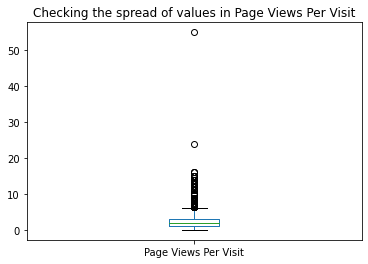

In [34]:
# Creating a box plot for numerical column
plt.title('Checking the spread of values in Page Views Per Visit')
Leads_df['Page Views Per Visit'].plot.box()
plt.show()

In [35]:
# Checking the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='Page Views Per Visit')]

,Column Name,Null Counts,Null Percentages
9,Page Views Per Visit,137,1.48


**Observations:**
- Page Views per visit is a numerical column with 1.48% null values.
- We can see that it has a lot of outliers, so imputing the null values with mean is not ideal.
- Therefore we will impute the null values with median.

In [36]:
# Imputing the nulls with median
Leads_df['Page Views Per Visit'].fillna(Leads_df['Page Views Per Visit'].median(), inplace = True)

#### 2.2.7: Handling the null values in the column - 'TotalVisits'

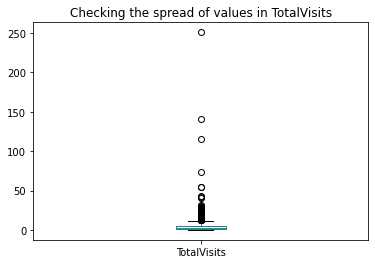

In [37]:
# Creating a box plot for numerical column
plt.title('Checking the spread of values in TotalVisits')
Leads_df['TotalVisits'].plot.box()
plt.show()

In [38]:
# Checking the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='TotalVisits')]

,Column Name,Null Counts,Null Percentages
7,TotalVisits,137,1.48


**Observations:**
- TotalVisits is a numerical column with 1.48% null values.
- We can see that it has a lot of outliers, so imputing the null values with mean is not ideal.
- Therefore we will impute the null values with median.

In [39]:
# Imputing the nulls with median
Leads_df['TotalVisits'].fillna(Leads_df['TotalVisits'].median(), inplace = True)

#### 2.2.8: Handling the null values in the column - 'Last Activity'

In [40]:
# Checking the different values in the column and their percentage composition
Leads_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Marked Spam                0.021889
Email Received                   0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [41]:
# Checking the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='Last Activity')]

,Column Name,Null Counts,Null Percentages
10,Last Activity,103,1.11


**Observations:**
- Last Activity is a categorical column with 1.11% null values.
- Since the null percentage is very less, we can impute missing values with 'Email Opened', which is the most frequent value (mode).

In [42]:
# Imputing the nulls with mode
Leads_df['Last Activity'].fillna(Leads_df['Last Activity'].value_counts().index[0], inplace = True)

#### 2.2.9: Handling the null values in the column - 'Lead Source'

In [43]:
# Checking the different values in the column and their percentage composition
Leads_df['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Press_Release         0.021730
Live Chat             0.021730
Pay per Click Ads     0.010865
blog                  0.010865
WeLearn               0.010865
NC_EDM                0.010865
testone               0.010865
welearnblog_Home      0.010865
youtubechannel        0.010865
Name: Lead Source, dtype: float64

In [44]:
# Checking the null percentage of the column
null_df[(null_df['Null Percentages']>0) & (null_df['Column Name']=='Lead Source')]

,Column Name,Null Counts,Null Percentages
3,Lead Source,36,0.39


**Observations:**
- Lead Source is a categorical column with 0.39% null values.
- Since the null percentage is very less, we can impute missing values with 'Google', which is the most frequent value (mode).

In [45]:
# Imputing the nulls with mode
Leads_df['Lead Source'].fillna(Leads_df['Lead Source'].value_counts().index[0], inplace = True)

In [46]:
# Checking for null counts after cleaning the dataset
Leads_df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

### 2.3 Checking for redundancy

#### 2.3.1 Checking for duplicate values in Prospect ID and Lead Number columns

Prospect ID and Lead number are used to uniquely identify a user. However, we will check for any duplicate entries, i.e., cases where same user appearing more than once in the dataset

In [47]:
print('No. of duplicate entries in Prospect ID: ', Leads_df['Prospect ID'].duplicated().sum())
print('No. of duplicate entries in Lead Number: ',Leads_df['Lead Number'].duplicated().sum())

No. of duplicate entries in Prospect ID:  0
No. of duplicate entries in Lead Number:  0


**Observations:**
- We have now established that these two columns are unique across the dataset. 
- Since we do not need 2 identifier columns, we will be dropping the Prospect ID column.

In [48]:
# Dropping the ID column
Leads_df.drop(['Prospect ID'], inplace = True, axis = 1)

#### 2.3.2: Checking for columns having only one unique value

If a column has the same value for every row in the dataset, there would be no variance and such columns would not be useful for model building. Therefore we will identify such columns and remove them.

In [49]:
# Using nunique() to identify the columns having a single value
summary_df = Leads_df.nunique().reset_index()
summary_df.columns = ['Column name', 'Unique count']

# Displaying the set of columns having a single value
summary_df[summary_df['Unique count']==1]

,Column name,Unique count
13,Magazine,1
19,Receive More Updates About Our Courses,1
20,Update me on Supply Chain Content,1
21,Get updates on DM Content,1
22,I agree to pay the amount through cheque,1


In [50]:
# Dropping the columns

cols_to_drop = summary_df[summary_df['Unique count']==1]['Column name']
Leads_df.drop(cols_to_drop, inplace = True, axis = 1)

#### 2.3.3: Checking for columns having the least variance

If the values in the column do not change, they would not suffice to explain the variance in the target variable. If 99 percent of the rows have the same value for a particular column, that column would not be useful for analysis.
Therefore we will identify and remove such columns

In [51]:
# Creating a list of all remaining columns in Leads_df
l1 = [x for x in list(Leads_df.columns)]

# df will contain the summary of all the categorical columns
df = summary_df[(summary_df['Column name'].isin(l1)) & (summary_df['Unique count']<50)]

# Creating a new column that will contain the percentage composition of the most frequent value in the column
df['Highest Percentages'] = df['Column name'].apply(lambda x: round(100*Leads_df[x].value_counts(normalize = True)[0],3) )
df

,Column name,Unique count,Highest Percentages
1,Lead Origin,5,52.879
2,Lead Source,21,31.429
3,Do Not Email,2,92.056
4,Do Not Call,2,99.978
5,Converted,2,61.461
6,TotalVisits,41,23.690
9,Last Activity,17,38.312
10,Specialization,19,36.580
11,What is your current occupation,7,60.606
12,Search,2,99.848


In [52]:
cols_to_drop = df[df['Highest Percentages']>99]['Column name']
cols_to_drop

4                 Do Not Call
12                     Search
14          Newspaper Article
15         X Education Forums
16                  Newspaper
17      Digital Advertisement
18    Through Recommendations
Name: Column name, dtype: object

In [53]:
# Dropping the columns
Leads_df.drop(cols_to_drop, inplace = True, axis = 1)

#### 2.3.4: Removal of columns with redundant data

`Last Activity and Last Notable Activity`<br>
These columns have almost the same data. Therefore we will drop one of these columns.

In [54]:
Leads_df[['Last Activity', 'Last Notable Activity']].value_counts().rename('Value counts').reset_index()

,Last Activity,Last Notable Activity,Value counts
0,Email Opened,Email Opened,2827
1,SMS Sent,SMS Sent,2172
2,Olark Chat Conversation,Modified,790
3,Email Opened,Modified,713
4,SMS Sent,Modified,573
5,Converted to Lead,Modified,428
6,Page Visited on Website,Modified,322
7,Page Visited on Website,Page Visited on Website,318
8,Email Bounced,Modified,266
9,Olark Chat Conversation,Olark Chat Conversation,183


**Observations:**
- Of the two columns, the last Notable Activity column has the value 'Modified' for a variety of actions, making the data in this column unreliable.
- Therefore, we will drop the column - Last Notable Activity

In [55]:
# Dropping the column
Leads_df.drop('Last Notable Activity',axis=1, inplace=True)

#### 2.3.5: Replacing redundant values in Lead Source column

In [56]:
list(Leads_df['Lead Source'].unique())

['Olark Chat',
 'Organic Search',
 'Direct Traffic',
 'Google',
 'Referral Sites',
 'Welingak Website',
 'Reference',
 'google',
 'Facebook',
 'blog',
 'Pay per Click Ads',
 'bing',
 'Social Media',
 'WeLearn',
 'Click2call',
 'Live Chat',
 'welearnblog_Home',
 'youtubechannel',
 'testone',
 'Press_Release',
 'NC_EDM']

**Observations:** 
- Here we see that there are two values of the same type - "Google" and "google". We will convert it to a single column.
- Also, the values 'blog', 'welearnblog_Home' and 'WeLearn' refer to the same source. These can come under the wider category: 'Blog'
- Further, we can also combine 'Facebook' and 'youtubechannel' with 'Social Media'

In [57]:
# Replacing 'google' with 'Google'
Leads_df['Lead Source'].replace(to_replace='google', value='Google', inplace=True)

# Replacing 'blog', 'welearnblog_Home' and 'WeLearn' with 'Blog'
Leads_df['Lead Source'].replace(to_replace=['blog', 'welearnblog_Home', 'WeLearn'], value='Blog', inplace=True)

# Replacing 'Facebook' and 'youtubechannel' with 'Social Media'
Leads_df['Lead Source'].replace(to_replace=['Facebook', 'youtubechannel'], value='Social Media', inplace=True)

# Checking the values after updates have been made
list(Leads_df['Lead Source'].unique())

['Olark Chat',
 'Organic Search',
 'Direct Traffic',
 'Google',
 'Referral Sites',
 'Welingak Website',
 'Reference',
 'Social Media',
 'Blog',
 'Pay per Click Ads',
 'bing',
 'Click2call',
 'Live Chat',
 'testone',
 'Press_Release',
 'NC_EDM']

#### 2.3.6: Renaming columns

Some of the columns in the dataset have lengthy names. We will shorten the names for better readability

In [58]:
Leads_df.columns = ['Lead Number','Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Current occupation',
       'Free copy of book']

In [59]:
# Displaying the number of columns present in dataframe after cleaning
print('Count of columns present in dataframe after cleaning: ',Leads_df.shape[1])

Count of columns present in dataframe after cleaning:  12


## Step 3: Exploratory Data Analysis

### 3.1 Graph functions

In [60]:
# Function to create distplots to show distribution for categorical columns
def pieplot(dfname, colname, coldesc, column_labels = None):
    plt.figure(figsize=(8,8))
    plt.title(coldesc, fontdict = {'fontsize':16})
    if column_labels is None:
        column_labels = pd.Series(list(dfname[colname].value_counts().index))
    dfname[colname].value_counts().plot.pie(labels = column_labels, label = '', shadow = True, autopct='%1.1f%%', pctdistance=0.65, colors = ['orange','Lightgreen'] )
    plt.legend()
    plt.show()

In [61]:
# Plotting Catplot for analysis for categorical vs. Categorical columns
def catplot(dfname, catcol_1, catcol_2,plt_height=5):
    x = catcol_1
    y = catcol_2
    dfname.groupby(catcol_1)[catcol_2].value_counts().rename('Count').reset_index().sort_values(by = [catcol_2]).pipe((sns.catplot,'data'),x=x,y='Count',hue=y,kind='bar' ,height=plt_height, aspect = 2,palette = sns.color_palette([ '#57F49A', '#F8AC8A']))
    plt.title('Analysis of '+catcol_1+' vs '+catcol_2,y=1.03,fontdict = {'fontsize':14})
    plt.xticks(rotation = 90)
    plt.show()

In [62]:
# Creating a list of numerical and categorical analysis, in order to plot graphs iteratively

numerical_cols = list(Leads_df.select_dtypes(include =["number"]).columns.values)
categorical_cols = list(Leads_df.select_dtypes(exclude =["number"]).columns.values)

# Removing the target variable and ID column from the list of numerical columns
numerical_cols.remove('Converted')
numerical_cols.remove('Lead Number')

### 3.2 Checking for imbalance in target column

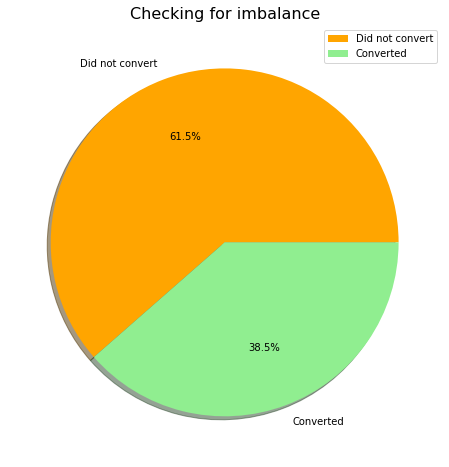

In [63]:
# Plotting a pie-chart for the target variable to check for imbalance
pieplot(Leads_df, 'Converted', 'Checking for imbalance', column_labels = ['Did not convert','Converted'])

**Observations**:
- We can see that the ratio of Converted and Non-Converted leads is almost 2:3.
- Therefore the data is not skewed and there is no imbalance in the dataset.

### 3.3 Univariate analysis

#### 3.3.1: Univariate analysis of numerical columns

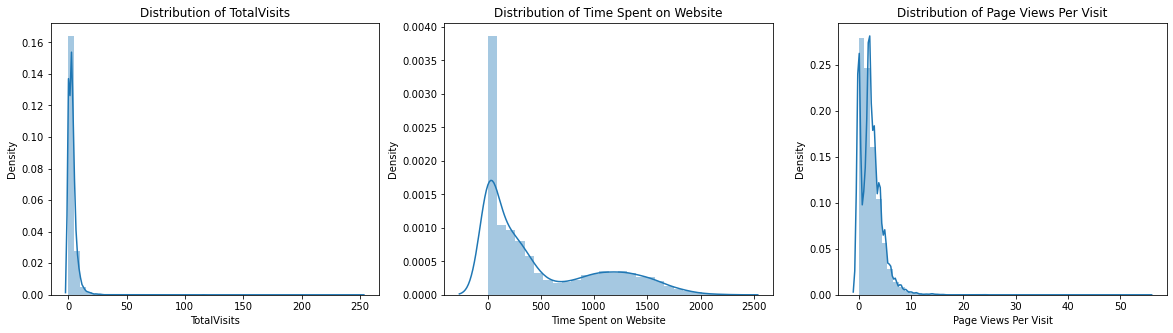

In [64]:
# Setting the figure size
plt.figure(figsize=(20, 5))

for i in range(0,len(numerical_cols)):
    # There are three numerical columns, which will be plotted in a 1x3 grid
    plt.subplot(1,3,i+1)
    plt.title('Distribution of '+numerical_cols[i])
    sns.distplot(Leads_df[numerical_cols[i]])

plt.show()

**Observations:**
- We can see that a majority of the users visit the website  0 to 50 times. However, there are some leads who visited the page almost 250 times.
- The Time Spent on the Website column does not seem to be normally distributed. However, most of the users spend less time, and a small portion of the users spend around 1000 to 1500 minutes on the website.
- Almost all the users viewed less than 10 pages per visit, with the exception of outliers who viewed more than 50 pages per visit

#### 3.3.2: Univariate analysis of categorical columns

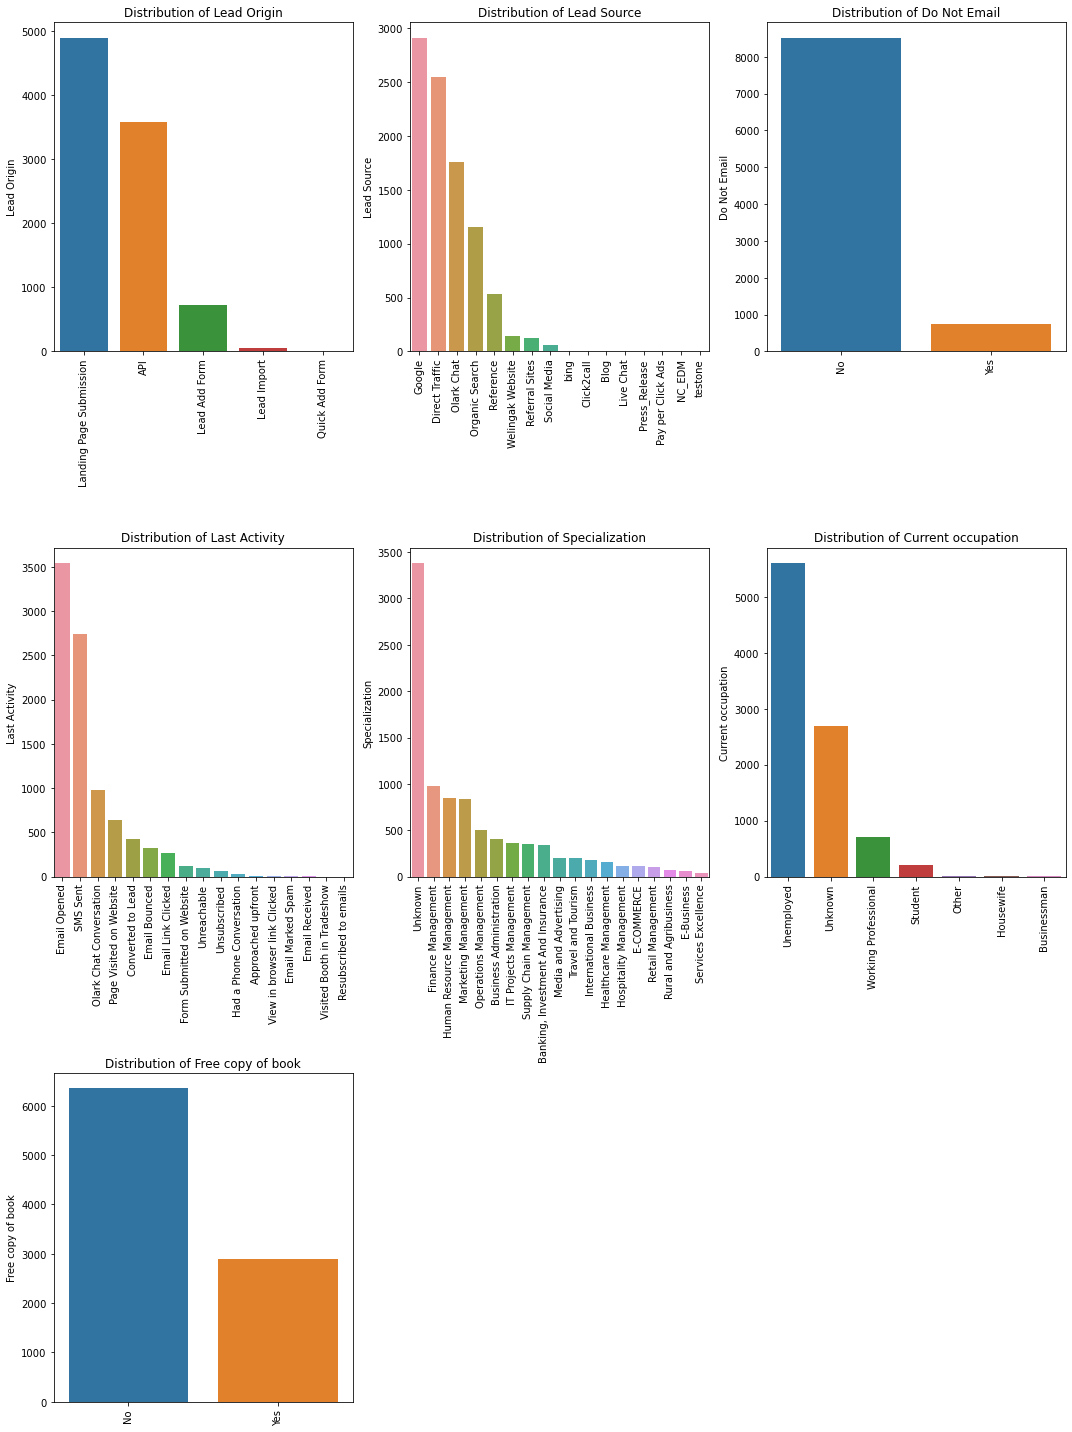

In [65]:
# Setting the figure size
plt.figure(figsize=(15,20))

for i in range(0,len(categorical_cols)):
    # The categorical columns will be plotted in a 3x3 grid
    plt.subplot(3,3,i+1)
    plt.title('Distribution of '+categorical_cols[i])
    
    # Rotating the x axis labels for readability
    plt.xticks(rotation=90)
    
    # Plotting the subplot for each column
    sns.barplot(Leads_df[categorical_cols[i]].value_counts().index, Leads_df[categorical_cols[i]].value_counts())

# Evenly spacing the subplots
plt.tight_layout()

plt.show()

**Observations:**
- Lead Origin: Over half of the leads that have originated through Landing page submission. Very few leads originated via Quick add forms.
- Leads Source: Most of the leads have been sourced through Google, Direct traffic and Olark Chat.
- Do Not Email: Almost 90% of the users opted out of Emails.
- Current Occupation: Over half of the users are Unemployed. Very few users are housewife and Businessman.
- Free copy of book: Over two-thirds of the users did not take the free copy of the book - Mastering the Interview.

### 3.4 Bivariate Analysis

#### 3.4.1: Analysis of Numeric vs. Numeric columns

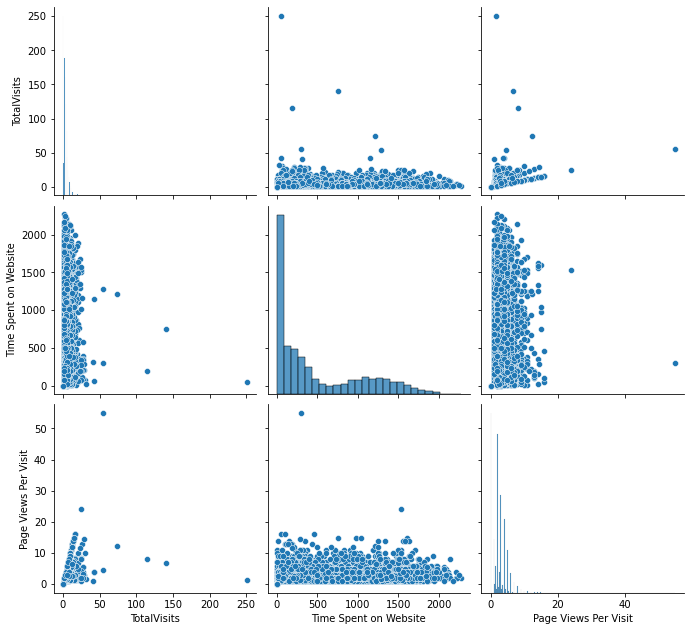

In [66]:
# Plotting a pairplot to analyze the numeric columns
g = sns.pairplot(Leads_df[numerical_cols])

# Setting the figure size
g.fig.set_size_inches(10,9)
plt.show()

**Observations:**
- On an average, we can see that TotalVisits of user to the website is only 0-50 times, irrespective of the total time spent on the website.
- We can also observe a similar, but weaker pattern between 'Time Spent on Website' and 'Page views per visit'. Most of the users viewed only 0-10 pages per visit, irrespective of the total time spent on the website. 

#### 3.4.2: Analysis of Numeric vs. categorical column (Target)

In [67]:
# Since the target is a 0/1 column, we will convert it to Yes/No for plotting graphs
temp_df = Leads_df.loc[:]
temp_df['Converted'].replace(to_replace=[0,1], value = ['Not Converted','Converted'], inplace=True)

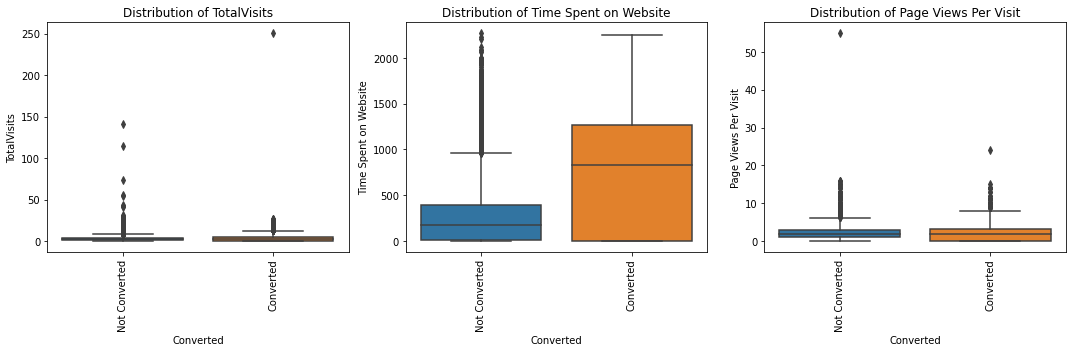

In [68]:
plt.figure(figsize=(15,5))

for i in range(0,len(numerical_cols)):
    
    # Creating a 1x3 subplot
    plt.subplot(1,3,i+1)
    plt.title('Distribution of '+numerical_cols[i])
    
    # Rotating the xticks for better readability
    plt.xticks(rotation=90)
    sns.boxplot(data=temp_df, x='Converted', y=numerical_cols[i])

plt.tight_layout()
plt.show()

**Observations:**
- Due to the presence of outliers, the boxplots for TotalVisits and Page Views per visit are not clear.
- However, we can see that the a majority of the people who converted spend more time on website than those who do not.
- Also, the distribution of time spent is more well-spread among converted users than non-converted users.

#### 3.4.3: Analysis of Categorical columns vs. categorical column (Target)

**'Lead Origin' and 'Lead Source'**

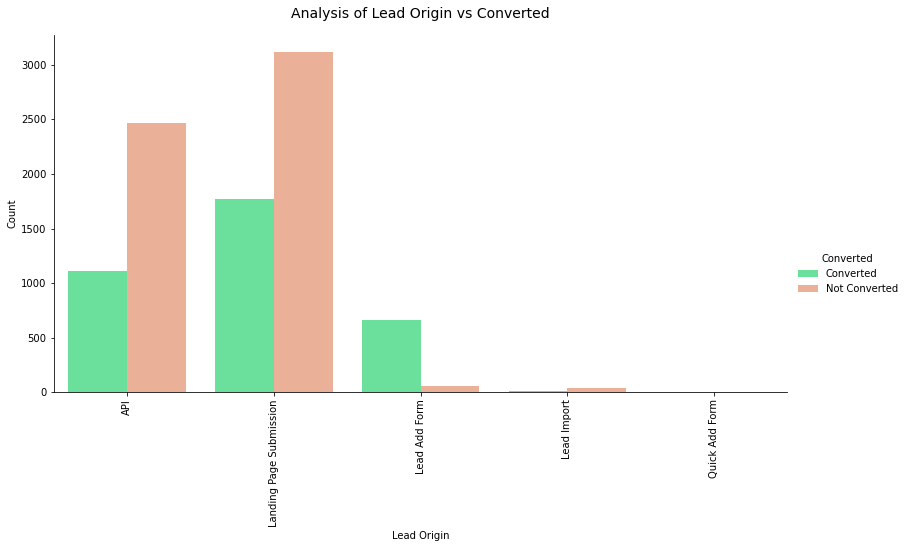

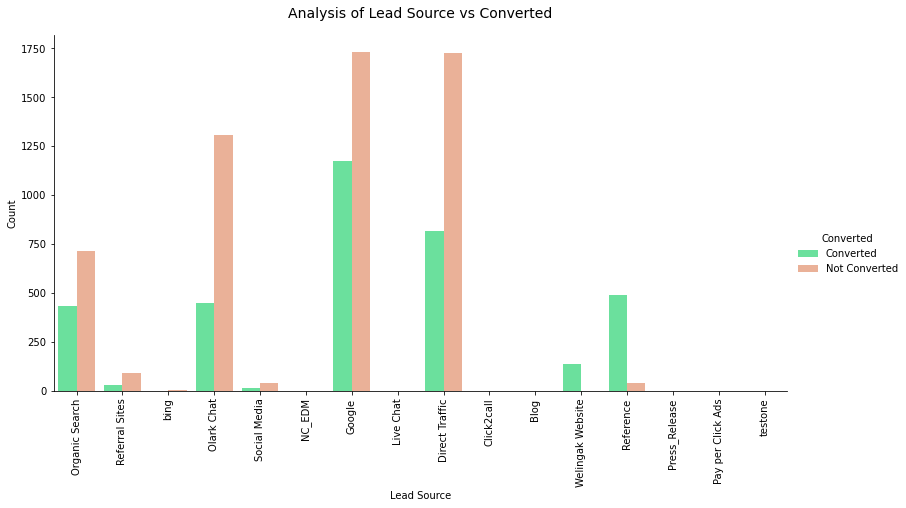

In [69]:
# Plotting catplot with target column for 'Lead Origin' and 'Lead Source' iteratively
cols = ['Lead Origin', 'Lead Source']
for i in range(0,2):
    catplot(temp_df,  cols[i], 'Converted',5.5)

**Observations**
- Looking at the 'Lead Origin' column, we can see that although there are fewer leads that originated through 'Lead Add Form', but the lead conversion rate is extremely high for this category.
- Similarly in the 'Lead Source' column, leads that are sourced through Reference and Welingak website, though fewer in number, have a higher conversion rate.

**'Last Activity' and 'Specialization'**

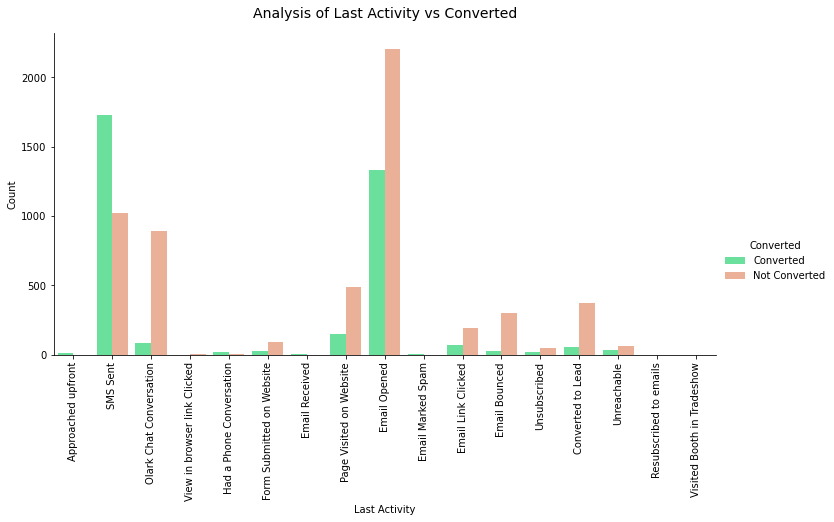

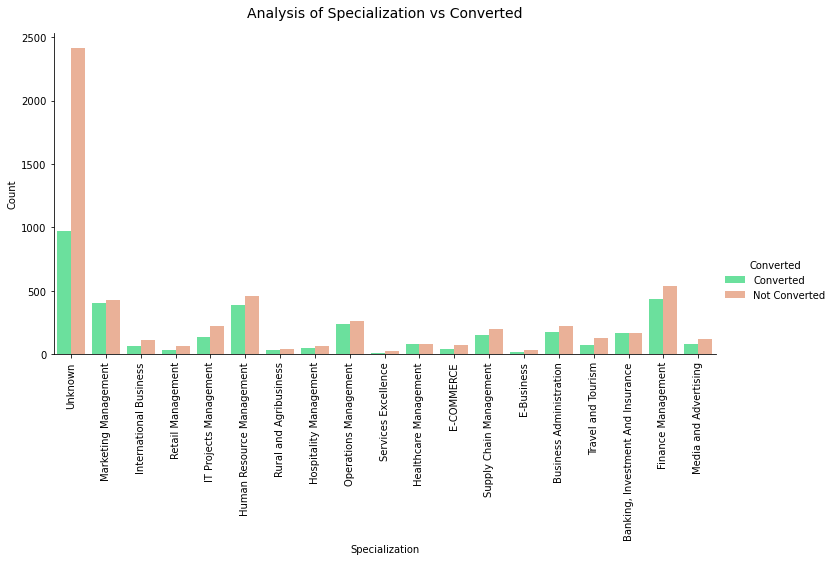

In [70]:
# Plotting catplot with target column for 'Last Activity' and 'Specialization' iteratively
cols = ['Last Activity', 'Specialization']
for i in range(0,2):
    catplot(temp_df,  cols[i], 'Converted',5)

**Observations:**
- The Leads whose 'Last Activity' is 'SMS sent' have an high conversion rate. On the other hand, The leads whose last activity is Olark Chat have an extremely low conversion rate.
- Also, looking at the 'Specialization' column, we observe that the lead conversion rate is very bad for the leads whose specialization is Unknown. This is expected because people who are not interested to join would not have provided specialization details.

**'Do Not Email', 'Current Occupation' and 'Free copy of book'**

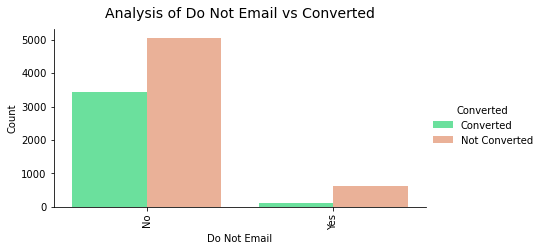

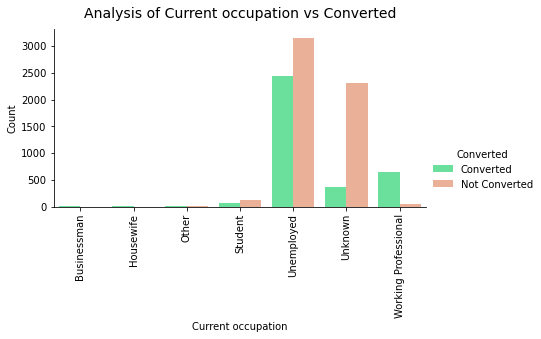

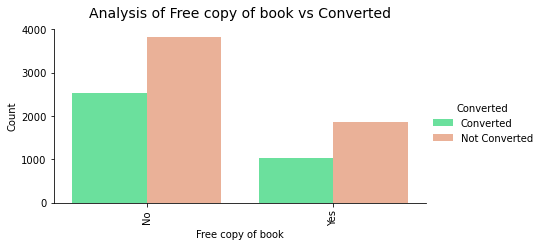

In [71]:
# Plotting catplot with target column for 'Do Not Email', 'Current occupation' and 'Free copy of book' iteratively
cols = ['Do Not Email', 'Current occupation', 'Free copy of book']
for i in range(0,3):
    catplot(temp_df,  cols[i], 'Converted', 3)

**Observations:**
- Looking at the 'Current Occupation' column, although there are fewer working professionals, the conversion rate for this category is very high.
- Also, the lead conversion rate is very bad for the leads whose Occupation is Unknown. This is also expected because people who are not interested to join would not have provided occupation details.
- Looking at the 'Free copy of book' column, irrespective of whether the lead has opted for a free copy of the book or not, there are more number of leads who did not convert than number of converted leads. Also, the conversion rate for people who opted out of the book is slightly higher.

### 3.5: Plotting the Correlation matrix for numerical columns

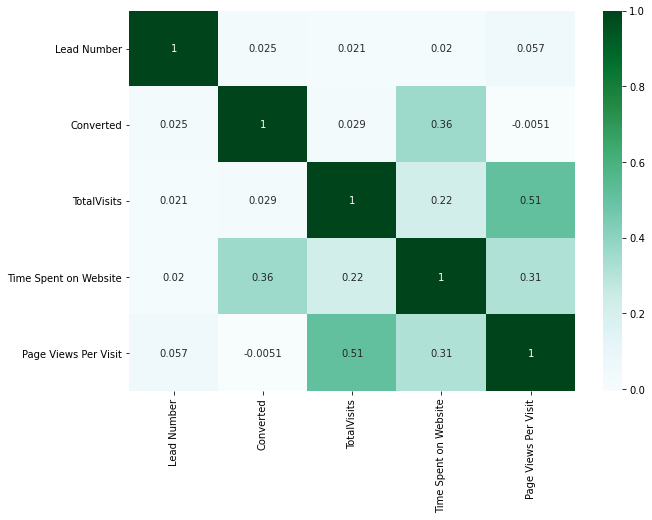

In [72]:
# Plotting the correlation matrix for numerical columns
plt.figure(figsize = (10,7))
sns.heatmap(Leads_df.corr(), annot = True, cmap = 'BuGn')
plt.show()

**Observations:**
- We do not see any high correlation among the numerical columns, therefore we will not remove any columns right now.

## Step 4: Data Preparation

### 4.1: Mapping Yes/No variables to 0/1

In [73]:
# List of variables to map
varlist =  ['Do Not Email', 'Free copy of book']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list of columns
Leads_df[varlist] = Leads_df[varlist].apply(binary_map)

In [74]:
Leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current occupation,Free copy of book
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,0


### 4.2: Creating Dummy Variables for Categorical columns

In [75]:
# Removing the categorical variables that have been mapped
categorical_cols.remove('Do Not Email')
categorical_cols.remove('Free copy of book')

for col in categorical_cols:
    # Creating dummy variables for the column
    dums = pd.get_dummies(Leads_df[col], prefix=col, drop_first = True)
    
    #Adding the results to the Leads dataframe
    Leads_df = pd.concat([Leads_df,dums], axis=1)
    
    Leads_df.drop(col, inplace = True, axis = 1)

In [76]:
Leads_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Time Spent on Website,Page Views Per Visit,Free copy of book,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Current occupation_Housewife,Current occupation_Other,Current occupation_Student,Current occupation_Unemployed,Current occupation_Unknown,Current occupation_Working Professional
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


##  Step 5: Plotting the correlation matrix 

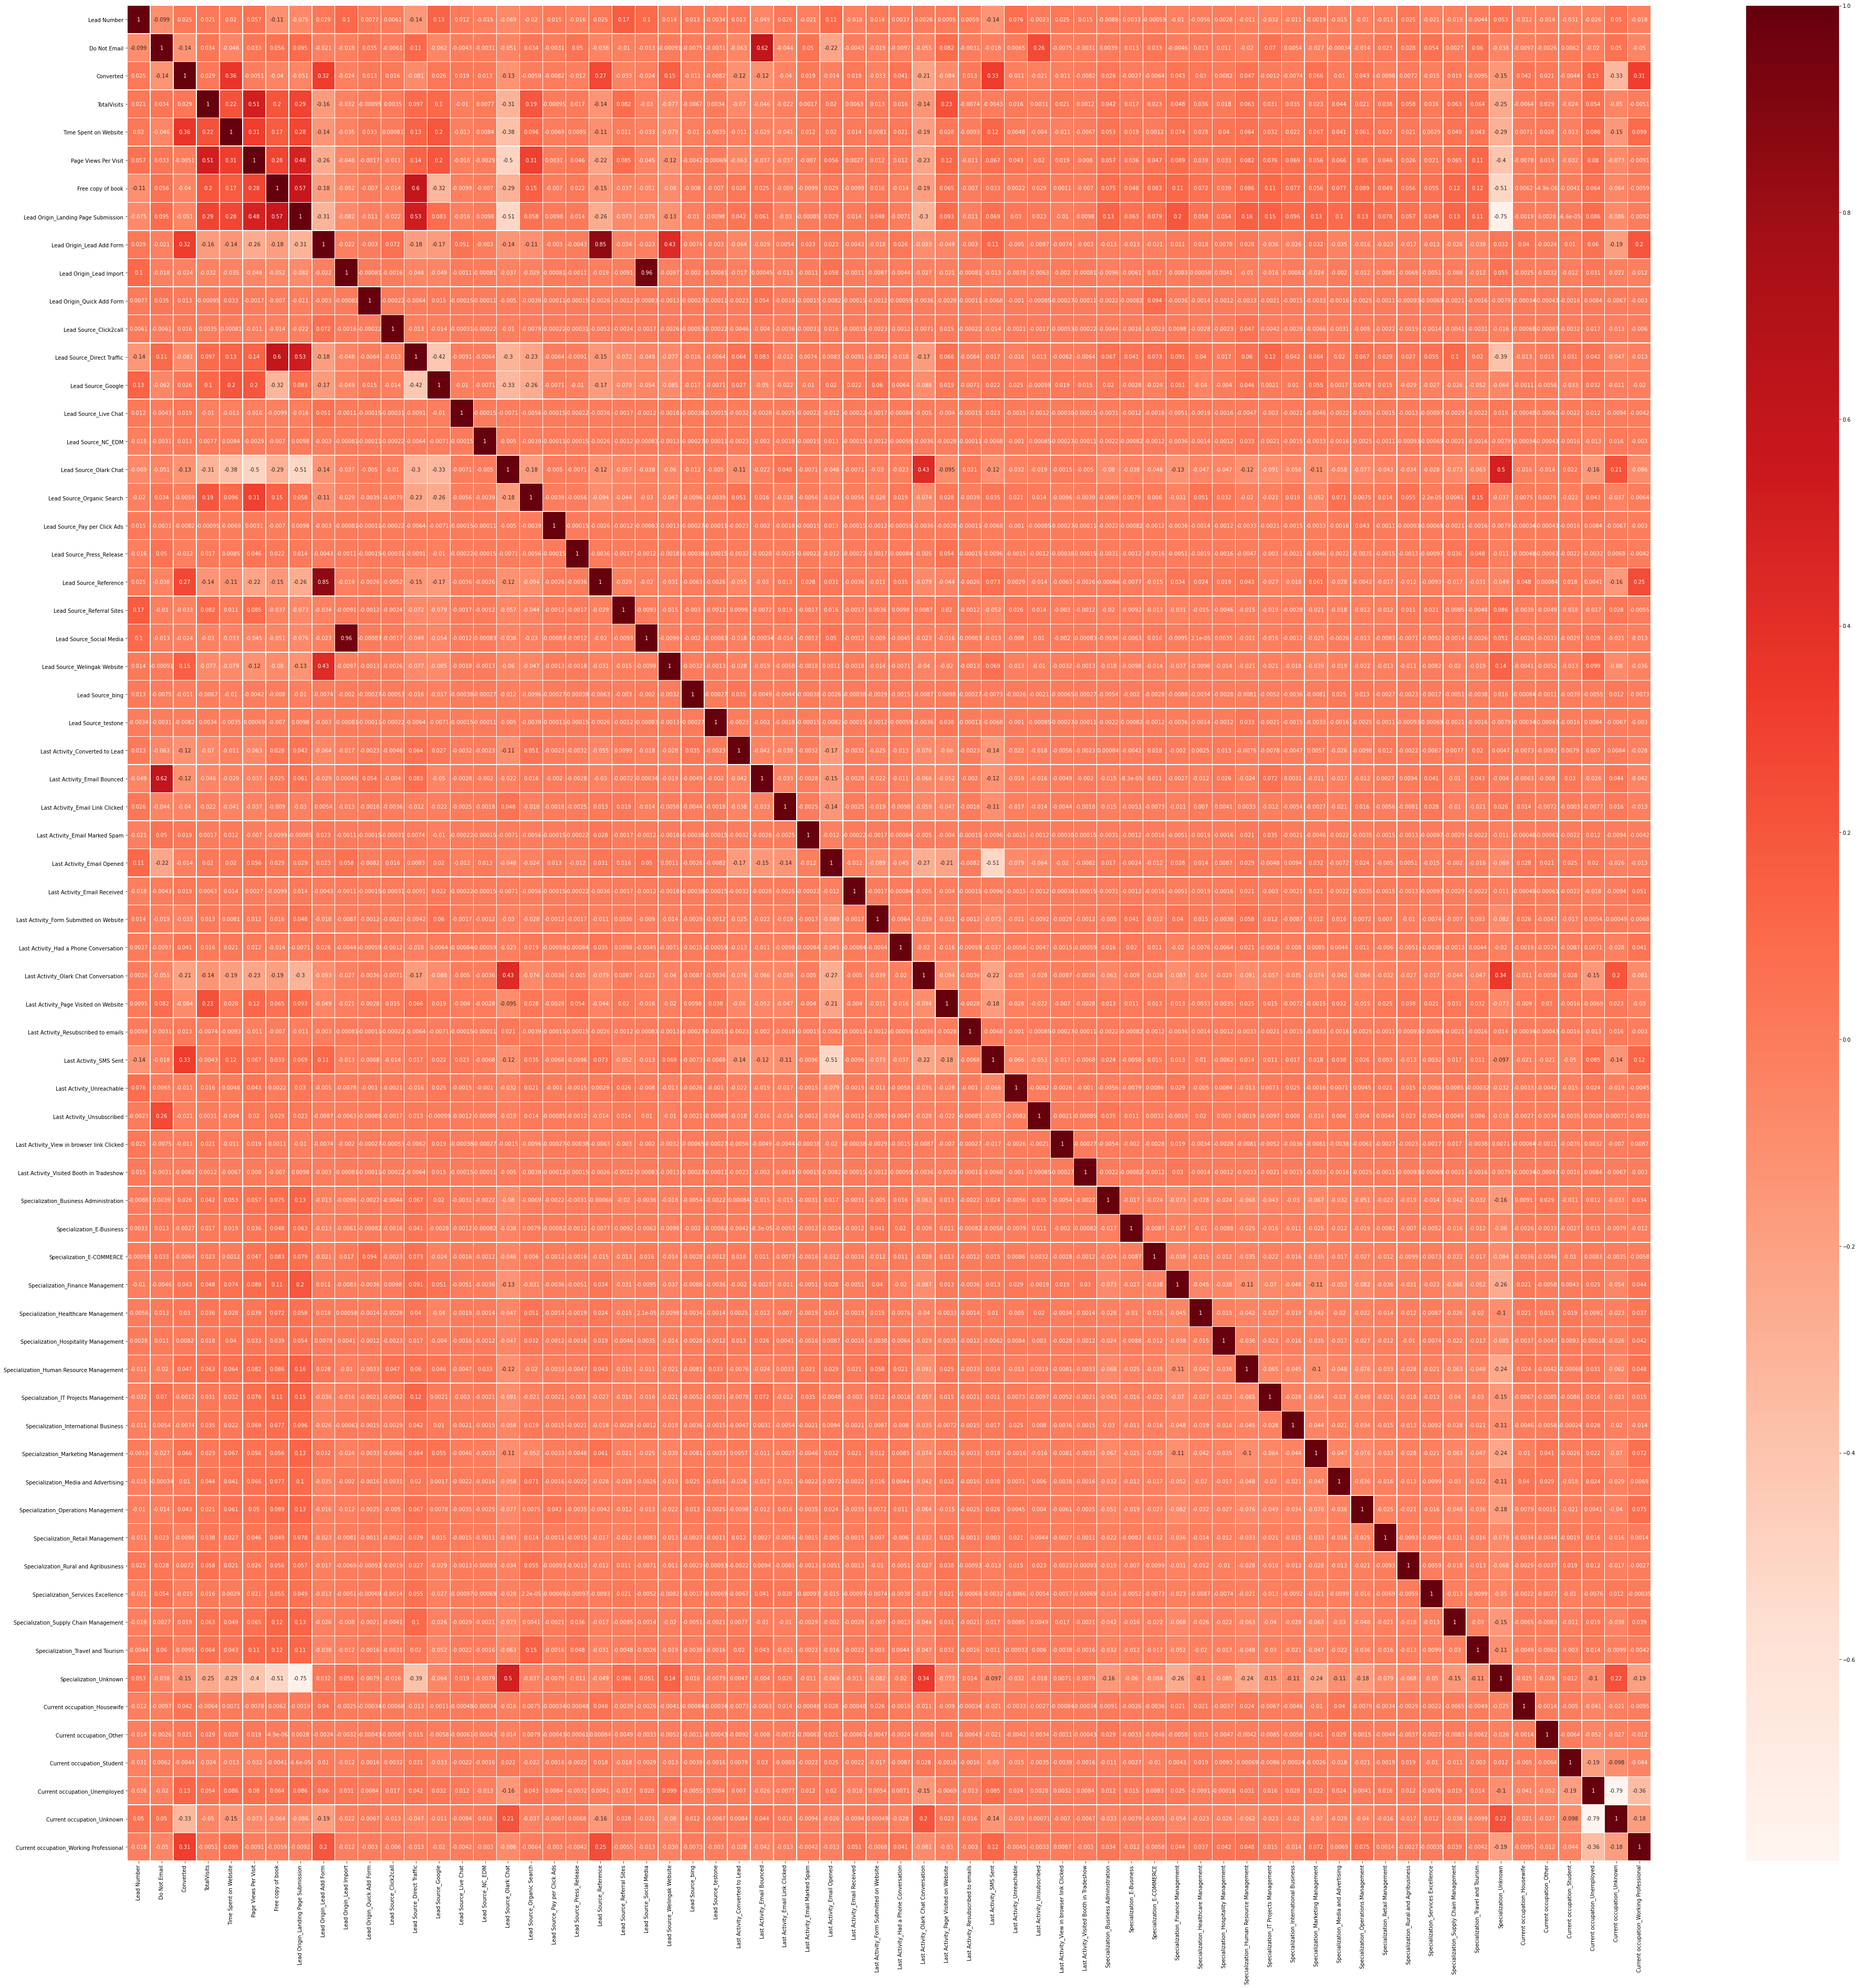

In [77]:
fig, ax = plt.subplots(figsize=(65,65))
sns.heatmap(Leads_df.corr(), annot=True, linewidths=.5, ax=ax, cmap = 'Reds')
plt.show()

**Observations:**
- Some of the columns are highly correlated with correlation > 0.7:
    - 'Lead Source_Reference' and 'Lead Origin_Lead Add Form' $\rightarrow$ 0.85
    - 'Lead Origin_Lead Import' and 'Lead Source_Social Media' $\rightarrow$ 0.96
    - 'Lead Origin_Landing Page Submission' and 'Specialization_Unknown' $\rightarrow$ -0.75
    - 'Current occupation_Unemployed' and 'Current occupation_Unknown' $\rightarrow$ -0.79
- We will remove one column from each pair to ensure there is no redundancy

In [78]:
# Displaying the number of columns present in dataframe before dropping
print('Count of columns present in dataframe before dropping: ',Leads_df.shape[1])

# Dropping columns that are highly correlated with other columns:
cols_to_drop = ['Lead Source_Reference', 'Lead Origin_Lead Import', 'Specialization_Unknown', 'Current occupation_Unknown']
Leads_df.drop(cols_to_drop, axis = 1, inplace = True)

# Displaying the number of columns present in dataframe after dropping
print('Count of columns present in dataframe after dropping: ',Leads_df.shape[1])

Count of columns present in dataframe before dropping:  66
Count of columns present in dataframe after dropping:  62


## Step 6: Test-Train Split

In [79]:
# Putting feature variable to X
X = Leads_df.drop(['Converted', 'Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,Time Spent on Website,Page Views Per Visit,Free copy of book,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current occupation_Housewife,Current occupation_Other,Current occupation_Student,Current occupation_Unemployed,Current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [80]:
# Putting response variable to y
y = Leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 7: Feature Scaling

In [82]:
# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Applying fit_transform on the train dataset
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_train.head()

,Do Not Email,TotalVisits,Time Spent on Website,Page Views Per Visit,Free copy of book,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current occupation_Housewife,Current occupation_Other,Current occupation_Student,Current occupation_Unemployed,Current occupation_Working Professional
1871,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6795,0,0.015936,0.214349,0.024182,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3516,0,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8105,0,0.019920,0.541373,0.090909,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Step 8: Model Building

### 8.1: Building the First Model

In [83]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6408
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.7
Date:                Wed, 08 Sep 2021   Deviance:                       5153.3
Time:                        12:53:51   Pearson chi2:                 8.71e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         20.2163    2.8e+04      0.001      0.999   -5.48e+04    5.48e+04
Do Not Email                                  -1.2006      0.215     -5.589      0.000      -1.622      -0.780
TotalVisits                                    9.4174      2.324      4.052      0.000       4.862      13.973
Time Spent on Website                          4.4722      0.169     26.479      0.000       4.141       4.803
Page Views Per Visit                          -3.7235      1.357     -2.743      0.006      -6.384      -1.063
Free copy of book                             -0.1446      0.108     -1.334      0.182      -0.357       0.068
Lead Origin_Landing Page Submission           -0.6412      0.130     -4.938      0.000      -0.896      -0.387
Lead Origin_Lead Add Form                      2.5278      0.505      5.005      0.000       1.538       3.518
Lead Origin_Quick Add Form                    22.1450   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Click2call                        -1.3432      1.273     -1.055      0.291      -3.838       1.152
Lead Source_Direct Traffic                    -0.5392      0.536     -1.006      0.314      -1.589       0.511
Lead Source_Google                            -0.2814      0.523     -0.538      0.591      -1.307       0.744
Lead Source_Live Chat                         21.3972   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                            24.2716   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                         0.6808      0.539      1.263      0.207      -0.376       1.738
Lead Source_Organic Search                    -0.3941      0.539     -0.731      0.465      -1.451       0.663
Lead Source_Pay per Click Ads                -22.1617   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                    -20.9107   5.54e+04     -0.000      1.000   -1.09e+05    1.09e+05
Lead Source_Referral Sites                    -0.4591      0.616     -0.746      0.456      -1.666       0.748
Lead Source_Social Media                      -0.8824      0.714     -1.236      0.217      -2.282       0.517
Lead Source_Welingak Website                   2.2635      0.755      3.000      0.003       0.784       3.742
Lead Source_bing                               0.4467      1.611      0.277      0.782      -2.711       3.604
Lead Source_testone                          8.05e-10   6.66e-06      0.000      1.000   -1.31e-05    1.31e-05
Last Activity_Converted to Lead              -24.1345    2.8e+04     -0.001      0.999   -5.48e+04    5.48e+04
Last Activity_Email Bounced                  -23.7296    2.8e+04     -0.001      0.999

### 8.2: Feature Selection Using RFE

In [84]:
# Creating a logreg object to perform RFE
logreg = LogisticRegression()

# Selecting 25 columns using RFE
rfe = RFE(logreg, 25)     
rfe = rfe.fit(X_train, y_train)

# Displaying the list of columns selected by RFE and the ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Free copy of book', False, 32),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Quick Add Form', False, 26),
 ('Lead Source_Click2call', False, 4),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 29),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 25),
 ('Lead Source_Press_Release', False, 24),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 36),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1)

In [85]:
# Retaining the columns selected by RFE in the training dataset
col = X_train.columns[rfe.support_]

# Displaying the columns that were not selected by RFE
X_train.columns[~rfe.support_]

Index(['Free copy of book', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Quick Add Form', 'Lead Source_Click2call',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_bing', 'Lead Source_testone',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received', 'Last Activity_Unreachable',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Intern

### 8.3: Running Second Model

In [86]:
# Buidling Model using RFE-Selected columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

We will assess the model using StatsModels

In [87]:
# Displaying the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.1
Date:                Wed, 08 Sep 2021   Deviance:                       5244.2
Time:                        12:53:54   Pearson chi2:                 8.31e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.0770      0.125    -24.569      0.000      -3.322      -2.832
Do Not Email                                  -1.2150      0.210     -5.788      0.000      -1.626      -0.804
TotalVisits                                    9.1864      2.305      3.986      0.000       4.669      13.703
Time Spent on Website                          4.5234      0.166     27.204      0.000       4.197       4.849
Page Views Per Visit                          -3.8762      1.286     -3.014      0.003      -6.397      -1.356
Lead Origin_Lead Add Form                      3.2550      0.198     16.453      0.000       2.867       3.643
Lead Source_NC_EDM                            23.6566   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                         1.2241      0.122     10.063      0.000       0.986       1.463
Lead Source_Welingak Website                   2.0199      0.749      2.697      0.007       0.552       3.488
Last Activity_Converted to Lead               -1.3522      0.224     -6.026      0.000      -1.792      -0.912
Last Activity_Email Bounced                   -0.9641      0.357     -2.699      0.007      -1.664      -0.264
Last Activity_Email Link Clicked              -0.5288      0.226     -2.344      0.019      -0.971      -0.087
Last Activity_Form Submitted on Website       -0.6867      0.346     -1.986      0.047      -1.364      -0.009
Last Activity_Had a Phone Conversation         2.0572      0.677      3.040      0.002       0.731       3.384
Last Activity_Olark Chat Conversation         -1.3382      0.168     -7.976      0.000      -1.667      -1.009
Last Activity_Page Visited on Website         -0.6173      0.154     -4.001      0.000      -0.920      -0.315
Last Activity_Resubscribed to emails          24.4190   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                         1.1053      0.079     13.965      0.000       0.950       1.260
Last Activity_Unsubscribed                     0.6331      0.492      1.287      0.198      -0.331       1.598
Last Activity_View in browser link Clicked    -1.1830      1.241     -0.953      0.340      -3.615       1.249
Specialization_Rural and Agribusiness          0.4811      0.386      1.246      0.213      -0.276       1.238
Current occupation_Housewife                  23.8992   1.39e+04      0.002      0.999   -2.73e+04    2.73e+04
Current occupation_Other                       1.0033      0.788      1.273      0.203      -0.542       2.549
Current occupation_Student                     1.2083      0.238      5.068      0.000       0.741       1.676
Current occupation_Unemployed                  1.1499      0.087     13.229      0.000

In [88]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.97
23,Current occupation_Unemployed,2.60
0,Do Not Email,2.15
2,Time Spent on Website,2.06
9,Last Activity_Email Bounced,1.96
1,TotalVisits,1.94
16,Last Activity_SMS Sent,1.71
6,Lead Source_Olark Chat,1.60
4,Lead Origin_Lead Add Form,1.55
13,Last Activity_Olark Chat Conversation,1.43


In [89]:
# Predicting the Conversion probability using the model and storing it in a dataframe
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Index'] = y_train.index

**We will be assuming the cut-off value as 0.5 to check accuracy**

In [90]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Index,predicted
0,0,0.331159,1871,0
1,0,0.288065,6795,0
2,0,0.381048,3516,0
3,0,0.811178,8105,1
4,0,0.331159,3934,0


In [91]:
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2),'%')

Accuracy : 81.97 %


**Observations:**
- To compute accuracy of the model, we will assume that the cutoff value of conversion is 0.5
- Entries having conversion probability >0.5 will be predicted as 'Converted' and vice versa.
- Looking at the statsmodel summary and the VIF values we observe that although all the columns have low VIF, the p-values of some columns are extremely high:
    - 'Lead Source_NC_EDM', 
    - 'Last Activity_Resubscribed to emails', 
    - 'Current occupation_Housewife', 
    - 'Last Activity_View in browser link Clicked',
    - 'Specialization_Rural and Agribusiness',
    - 'Current occupation_Housewife',
    - 'Current occupation_Other'
- Columns with high p-values are stastistically insignificant, therefore we will be dropping these columns

In [92]:
# Dropping the columns with high p-value.
col = col.drop(['Lead Source_NC_EDM', 'Last Activity_Resubscribed to emails', 'Current occupation_Housewife', 'Last Activity_View in browser link Clicked','Specialization_Rural and Agribusiness','Current occupation_Housewife','Current occupation_Other'], 1)
col

Index(['Do Not Email', 'TotalVisits', 'Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Current occupation_Student',
       'Current occupation_Unemployed',
       'Current occupation_Working Professional'],
      dtype='object')

### 8.3: Running Third Model

In [93]:
# Building the model after dropping columns with high p-value
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

In [94]:
# Displaying the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.2
Date:                Wed, 08 Sep 2021   Deviance:                       5278.4
Time:                        12:53:54   Pearson chi2:                 8.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.0127      0.124    -24.369      0.000      -3.255      -2.770
Do Not Email                               -1.2101      0.210     -5.771      0.000      -1.621      -0.799
TotalVisits                                 9.4387      2.297      4.109      0.000       4.936      13.941
Time Spent on Website                       4.5189      0.166     27.272      0.000       4.194       4.844
Page Views Per Visit                       -3.9909      1.282     -3.112      0.002      -6.504      -1.478
Lead Origin_Lead Add Form                   3.3002      0.198     16.685      0.000       2.913       3.688
Lead Source_Olark Chat                      1.2078      0.121      9.971      0.000       0.970       1.445
Lead Source_Welingak Website                1.9695      0.749      2.629      0.009       0.501       3.438
Last Activity_Converted to Lead            -1.3616      0.224     -6.080      0.000      -1.801      -0.923
Last Activity_Email Bounced                -0.9864      0.357     -2.760      0.006      -1.687      -0.286
Last Activity_Email Link Clicked           -0.5221      0.223     -2.341      0.019      -0.959      -0.085
Last Activity_Form Submitted on Website    -0.6027      0.338     -1.786      0.074      -1.264       0.059
Last Activity_Had a Phone Conversation      2.0355      0.676      3.011      0.003       0.710       3.361
Last Activity_Olark Chat Conversation      -1.3549      0.167     -8.091      0.000      -1.683      -1.027
Last Activity_Page Visited on Website      -0.6226      0.154     -4.050      0.000      -0.924      -0.321
Last Activity_SMS Sent                      1.0878      0.079     13.801      0.000       0.933       1.242
Last Activity_Unsubscribed                  0.6274      0.493      1.272      0.203      -0.339       1.594
Current occupation_Student                  1.1732      0.237      4.942      0.000       0.708       1.638
Current occupation_Unemployed               1.0984      0.085     12.858      0.000       0.931       1.266
Current occupation_Working Professional     3.6642      0.199     18.415      0.000       3.274       4.054
===========================================================================================================
"""

In [95]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.96
17,Current occupation_Unemployed,2.58
0,Do Not Email,2.15
2,Time Spent on Website,2.05
8,Last Activity_Email Bounced,1.96
1,TotalVisits,1.93
14,Last Activity_SMS Sent,1.71
5,Lead Source_Olark Chat,1.60
4,Lead Origin_Lead Add Form,1.54
12,Last Activity_Olark Chat Conversation,1.43


In [96]:
# Predicting the Conversion probability using the model and storing it in a dataframe
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [97]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Displaying the accuracy
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2),'%')

Accuracy : 81.83 %


**We will be dropping the column with high p-values -** 
- Last Activity_Form Submitted on Website
- Last Activity_Unsubscribed

In [98]:
# Dropping the columns with high p-value.
col = col.drop(['Last Activity_Form Submitted on Website','Last Activity_Unsubscribed'], 1)
col

Index(['Do Not Email', 'TotalVisits', 'Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Current occupation_Student', 'Current occupation_Unemployed',
       'Current occupation_Working Professional'],
      dtype='object')

### 8.4: Running Fourth Model

In [99]:
# Building the model after dropping columns
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()

In [100]:
# Displaying the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.7
Date:                Wed, 08 Sep 2021   Deviance:                       5283.5
Time:                        12:53:55   Pearson chi2:                 8.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.0219      0.123    -24.567      0.000      -3.263      -2.781
Do Not Email                               -1.1207      0.194     -5.783      0.000      -1.501      -0.741
TotalVisits                                 9.2781      2.294      4.045      0.000       4.783      13.774
Time Spent on Website                       4.5194      0.166     27.286      0.000       4.195       4.844
Page Views Per Visit                       -3.9666      1.280     -3.099      0.002      -6.475      -1.458
Lead Origin_Lead Add Form                   3.3057      0.198     16.705      0.000       2.918       3.694
Lead Source_Olark Chat                      1.2108      0.121     10.002      0.000       0.974       1.448
Lead Source_Welingak Website                1.9592      0.749      2.616      0.009       0.492       3.427
Last Activity_Converted to Lead            -1.3518      0.224     -6.044      0.000      -1.790      -0.913
Last Activity_Email Bounced                -1.0581      0.349     -3.034      0.002      -1.742      -0.375
Last Activity_Email Link Clicked           -0.5137      0.223     -2.306      0.021      -0.950      -0.077
Last Activity_Had a Phone Conversation      2.0389      0.674      3.025      0.002       0.718       3.360
Last Activity_Olark Chat Conversation      -1.3480      0.167     -8.064      0.000      -1.676      -1.020
Last Activity_Page Visited on Website      -0.6172      0.153     -4.032      0.000      -0.917      -0.317
Last Activity_SMS Sent                      1.0926      0.078     14.039      0.000       0.940       1.245
Current occupation_Student                  1.1806      0.237      4.973      0.000       0.715       1.646
Current occupation_Unemployed               1.0981      0.085     12.861      0.000       0.931       1.265
Current occupation_Working Professional     3.6620      0.199     18.429      0.000       3.273       4.051
===========================================================================================================
"""

In [101]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.96
15,Current occupation_Unemployed,2.57
2,Time Spent on Website,2.05
1,TotalVisits,1.93
0,Do Not Email,1.88
8,Last Activity_Email Bounced,1.83
13,Last Activity_SMS Sent,1.67
5,Lead Source_Olark Chat,1.60
4,Lead Origin_Lead Add Form,1.54
11,Last Activity_Olark Chat Conversation,1.42


In [102]:
# Predicting the Conversion probability using the model and storing it in a dataframe
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [103]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Index,predicted
0,0,0.328951,1871,0
1,0,0.288414,6795,0
2,0,0.378115,3516,0
3,0,0.808410,8105,1
4,0,0.328951,3934,0


In [104]:
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2),'%')

Accuracy : 81.8 %


**Observations:**
- This model has 17 variables and has an accuracy of 81.8%.
- For all the variables, the p-values are less than 0.05 and VIF is less than 5.
- We will now evaluate this model with other metrics.

### 8.5: Calculating other metrics

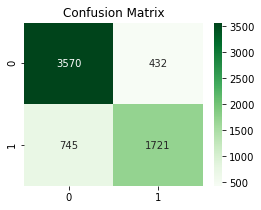

In [105]:
# Calculating the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )

# Displaying a heatmap of the confusion matrix
plt.figure(figsize = (4,3))
plt.title('Confusion Matrix')
sns.heatmap(confusion, annot = True, cmap = 'Greens' , fmt = 'g')
plt.show()

In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Checking the sensitivity of our  logistic regression model
print('Sensitivity :',round((TP / float(TP+FN)),3))

# Calculating the specificity
print('Specificity :',round((TN / float(TN+FP)),3))

# Calculate false postive rate
print('False positive Rate :',round(( FP/ float(TN+FP)),3))

# Positive predictive value/Precision
print('Positive predictive value :', round((TP / float(TP+FP)),3))

# Negative predictive value
print('Negative predictive value :',round((TN / float(TN+ FN)),3))

Sensitivity : 0.698
Specificity : 0.892
False positive Rate : 0.108
Positive predictive value : 0.799
Negative predictive value : 0.827


**Observations**
- Although we haven't arrived at the correct cut off yet, the model is still performing decently on the training dataset.
- The model has a sensitivity of 0.698, and a specificity of 0.892. This implies that the model is currently predicting some people as 'not hot leads' when they are actually hot leads. In order to change this, we need to lower the cutoff value from its current value of 0.5.
- However, we will use this as our model and we will now find the correct value of cut-off and then calculate other metrics and evaluate the model on both train and test data sets.

## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things like:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [107]:
# Function to draw ROC curve
def draw_roc( actual, probs ):
    
    # Creating ROC curve for the model
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    
    # Calculating the area under the ROC curve
    auc_score = metrics.roc_auc_score( actual, probs )
    
    # Plotting the ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the diagonal dotted line at 45 degrees
    plt.plot([0, 1], [0, 1], 'k--')  
    
    # Setting the x and y limits and axis labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    # Setting the title and legend
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

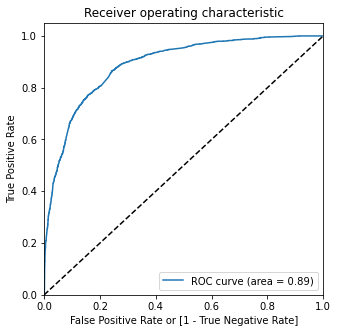

In [108]:
# Plotting the ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**Observations**
- The Receiver Operating Characteristic (ROC) curve for the model is good, and has a high area under the curve of 0.89
- This means the model's True Positive Rate is high, and the False Positive Rate is low.

## Step 10: Finding Optimal Cutoff Point

### 10.1: Creating columns with different probability cutoffs 

In [109]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.328951,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.288414,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.378115,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.808410,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.328951,3934,0,1,1,1,1,0,0,0,0,0,0


### 10.2: Plot accuracy sensitivity and specificity graph for various probabilities.

In [110]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# num is the list of cutoff values
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    # Calculating the confusion matrix 
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    
    # Calculating accuracy, specificity, sensitivity
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    # populating rows in the dataframe
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
# Displaying the final dataframe having metrics for all probabilities
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.611317,0.978102,0.385307
0.2,0.2,0.757112,0.914031,0.660420
0.3,0.3,0.794218,0.870235,0.747376
0.4,0.4,0.815244,0.761963,0.848076
0.5,0.5,0.818027,0.697891,0.892054
0.6,0.6,0.799474,0.600973,0.921789
0.7,0.7,0.782313,0.519870,0.944028
0.8,0.8,0.752938,0.399432,0.970765
0.9,0.9,0.716450,0.278183,0.986507


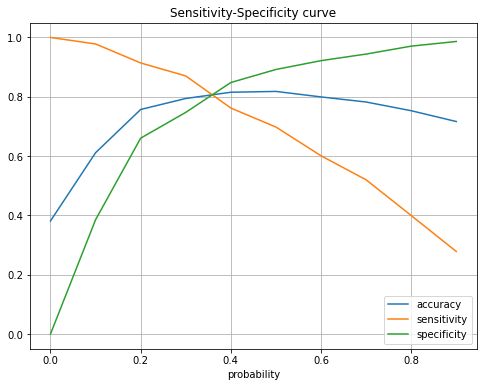

In [111]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'],figsize=(8,6))
plt.title('Sensitivity-Specificity curve')
plt.grid()
plt.show()

**Observations**
- The Specificity, Sensitivity and Accuracy curves intersect at probability =  0.35
- At this point, the values of all three metrics are close to 0.8, which is good.
- Hence, we will use 0.35 as the cut-off value for our model. 
- Rows having conversion probability >0.35 will be classified as 'Hot leads'

###  10.3: Using 0.35 as the cut-off probability

In [112]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.35 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.328951,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.288414,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.378115,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.808410,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.328951,3934,0,1,1,1,1,0,0,0,0,0,0,0


In [113]:
# Checking the overall accuracy.
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2),'%')

Accuracy : 80.71 %


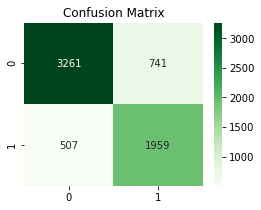

In [114]:
# Checking the confusion matrix after changing the cut-off value
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

# Displaying a heatmap of the confusion matrix
plt.figure(figsize = (4,3))
plt.title('Confusion Matrix')
sns.heatmap(confusion2, annot = True, cmap = 'Greens' , fmt = 'g')
plt.show()

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculating all the metrics
Sensitivity_train = round((TP / float(TP+FN)),3)
Specificity_train = round((TN / float(TN+FP)),3)
FPR_train = round(( FP/ float(TN+FP)),3)
Positive_predictive_value_train = round((TP / float(TP+FP)),3)
Negative_predictive_value_train = round((TN / float(TN+ FN)),3)



# Printing all the metrics
print('Sensitivity :',Sensitivity_train)
print('Specificity :',Specificity_train)
print('False positive Rate :',FPR_train)
print('Positive predictive value :',Positive_predictive_value_train)
print('Negative predictive value :',Negative_predictive_value_train)

Sensitivity : 0.794
Specificity : 0.815
False positive Rate : 0.185
Positive predictive value : 0.726
Negative predictive value : 0.865


**Observations:**
- On choosing 0.35 as the cutoff value, we see that the model is performing better.
- The model has the specificity and sensitivity as 0.8, and has a low false-positive rate, which is an indicator that the model is performing well.
- The model has 0.8 sensitivity, which means that the model is able to correctly predict 80% of the leads as 'Hot leads'

### 10.4:  Plotting Precision-Recall curve

In [116]:
#Printing the precision and recall for the new model
Precision_train=round(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),3)
Recall_train = round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),3)
f1_score_train = round(2*(Precision_train*Recall_train)/(Precision_train+Recall_train),3)
print('Precision :',Precision_train)
print('Recall: ',Recall_train)
print('F1 Score: ',f1_score_train)

Precision : 0.726
Recall:  0.794
F1 Score:  0.758


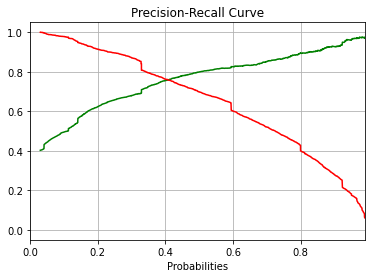

In [117]:
#plotting the Precision-Recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.title('Precision-Recall Curve')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('Probabilities')
plt.xlim([0.0, 0.99])
plt.grid()
plt.show()

**Observations:**
- We see that the precision-recall curve intersects at probability = 0.4.
- However in alignment with the business requirements, we will choose the probability as 0.35, which has a slightly higher recall and a slightly lower precision.
- This ensures that a majority of the 'Hot leads' are predicted correctly, and these can be targetted by X education.

## Step 11: Model Evaluation

### 11.1: Create a final dataframe with Target Test dataset and predicted dataset

In [118]:
# Scaling the test dataset using the transform function
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_test[numerical_cols].head()

,TotalVisits,Time Spent on Website,Page Views Per Visit
4269,0.031873,0.444982,0.145455
2376,0.000000,0.000000,0.000000
7766,0.019920,0.025968,0.090909
9199,0.000000,0.000000,0.000000
4359,0.000000,0.000000,0.000000


In [119]:
# Retaining only those columns which were used in the final model
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current occupation_Student,Current occupation_Unemployed,Current occupation_Working Professional
4269,0,0.031873,0.444982,0.145455,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,1,0
7766,0,0.019920,0.025968,0.090909,0,0,0,0,0,0,0,0,0,0,0,0,1
9199,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
4359,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0


In [120]:
# Adding constant to the test dataset
X_test_sm = sm.add_constant(X_test)

In [121]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [122]:
# Converting y_test_pred to a dataframe 
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
4269,0.450284
2376,0.922334
7766,0.641449
9199,0.112952
4359,0.799300


In [123]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# adding index to y_test_df
y_test_df['Index'] = y_test_df.index

In [124]:
# Resetting index for both dataframes to append them
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming the conversion probability column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

# Rearranging the columns in final dataframe
y_pred_final = y_pred_final.reindex(['Index','Converted','Conversion_Prob'], axis=1)
y_pred_final.head()

# Creating new column 'final_predicted' with 1 if Conversion_Prob > 0.35 else 0
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Index,Converted,Conversion_Prob,final_predicted
0,4269,1,0.450284,1
1,2376,1,0.922334,1
2,7766,1,0.641449,1
3,9199,0,0.112952,0
4,4359,1,0.799300,1


All the converted and the predicted values are present in the y_pred_final. <br>
Now we will check the metrics for the predicted values of test dataset.

### 11.2: Check the metrics for predicted values

In [126]:
# Checking the overall accuracy.
print('Accuracy :',round(100*metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2),'%')

Accuracy : 81.39 %


In [127]:
# Checking the confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1376,  301],
       [ 215,  880]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Calculating all the metrics
Sensitivity_test = round((TP / float(TP+FN)),3)
Specificity_test = round((TN / float(TN+FP)),3)
FPR_test= round(( FP/ float(TN+FP)),3)
Positive_predictive_value_test = round((TP / float(TP+FP)),3)
Negative_predictive_value_test = round((TN / float(TN+ FN)),3)
Precision_test = round(precision_score(y_pred_final.Converted, y_pred_final.final_predicted),3)
Recall_test = round(recall_score(y_pred_final.Converted, y_pred_final.final_predicted),3)
f1_score_test = round(2*(Precision_test*Recall_test)/(Precision_test+Recall_test),3)

# Printing all the metrics
print('Sensitivity :',Sensitivity_test)
print('Specificity :',Specificity_test)
print('False positive Rate :',FPR_test)
print('Positive predictive value :',Positive_predictive_value_test)
print('Negative predictive value :',Negative_predictive_value_test)

#Printing the precision and recall for the new model
print('Precision :',Precision_test)
print('Recall: ', Recall_test)
print('F1 Score: ', f1_score_test)

Sensitivity : 0.804
Specificity : 0.821
False positive Rate : 0.179
Positive predictive value : 0.745
Negative predictive value : 0.865
Precision : 0.745
Recall:  0.804
F1 Score:  0.773


## Step 12: Calculating Lead score for the entire dataset

#### We will be calculating the Lead Score for all the leads from the train and test dataset.

In [130]:
# Selecting the columns 'Index', 'Converted', 'Conversion_Prob', 'final_predicted' from test dataset 
test_pred = y_pred_final.copy()
test_pred.head()

,Index,Converted,Conversion_Prob,final_predicted
0,4269,1,0.450284,1
1,2376,1,0.922334,1
2,7766,1,0.641449,1
3,9199,0,0.112952,0
4,4359,1,0.799300,1


In [131]:
# Selecting the columns 'Index', 'Converted', 'Conversion_Prob', 'final_predicted' from Train dataset 
train_pred = y_train_pred_final[['Index','Converted','Conversion_Prob','final_predicted']]
train_pred.head()

,Index,Converted,Conversion_Prob,final_predicted
0,1871,0,0.328951,0
1,6795,0,0.288414,0
2,3516,0,0.378115,1
3,8105,0,0.808410,1
4,3934,0,0.328951,0


#### Concatenating the train and the test dataset with the Conversion Probabilities

In [132]:
# Concatenating the 2 dataframes train and test using append() function
full_pred = train_pred.append(test_pred)
full_pred.head()

,Index,Converted,Conversion_Prob,final_predicted
0,1871,0,0.328951,0
1,6795,0,0.288414,0
2,3516,0,0.378115,1
3,8105,0,0.808410,1
4,3934,0,0.328951,0


In [133]:
# Inspecting the shape of the final, test and train dataframes
print(train_pred.shape)
print(test_pred.shape)
print(full_pred.shape)

(6468, 4)
(2772, 4)
(9240, 4)


In [134]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
full_pred['Lead Score'] = full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
full_pred.head()

,Index,Converted,Conversion_Prob,final_predicted,Lead Score
0,1871,0,0.328951,0,33
1,6795,0,0.288414,0,29
2,3516,0,0.378115,1,38
3,8105,0,0.808410,1,81
4,3934,0,0.328951,0,33


In [135]:
# Creating a dataframe with Lead Number and Index to merge 'full_pred' and 'Lead_id_df'
Lead_id_df=Leads_df['Lead Number'].reset_index()
Lead_id_df.columns=['Index','Lead Number']

###  Concatenating the 2 dataframes based on index.

##### This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [136]:
# Merging the two dataframes to assign the Lead Score to each Lead number
Final_df=pd.merge(full_pred, Lead_id_df, on='Index', how='inner')

In [137]:
# Dropping the 'Index' column as the dataframe already consists Lead Number as unique Lead ID
Final_df.drop('Index',inplace=True, axis=1)

In [138]:
Final_df

,Converted,Conversion_Prob,final_predicted,Lead Score,Lead Number
0,0,0.328951,0,33,641410
1,0,0.288414,0,29,597687
2,0,0.378115,1,38,626825
3,0,0.808410,1,81,587928
4,0,0.328951,0,33,622366
...,...,...,...,...,...
9235,0,0.068122,0,7,583730
9236,1,0.922334,1,92,639134
9237,0,0.328951,0,33,595041
9238,0,0.158876,0,16,608916


In [139]:
# Rearranging the columns of Final Dataframe
Final_df = Final_df.reindex(['Lead Number','Converted','Conversion_Prob','final_predicted','Lead Score'], axis=1)
Final_df

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead Score
0,641410,0,0.328951,0,33
1,597687,0,0.288414,0,29
2,626825,0,0.378115,1,38
3,587928,0,0.808410,1,81
4,622366,0,0.328951,0,33
...,...,...,...,...,...
9235,583730,0,0.068122,0,7
9236,639134,1,0.922334,1,92
9237,595041,0,0.328951,0,33
9238,608916,0,0.158876,0,16


In [140]:
# Adding the Lead Score to our original Dataframe
Leads_df_final=pd.merge(Leads_df, Final_df[['Lead Number','Lead Score']], on='Lead Number', how='inner')
Leads_df_final

,Lead Number,Do Not Email,Converted,TotalVisits,Time Spent on Website,Page Views Per Visit,Free copy of book,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current occupation_Housewife,Current occupation_Other,Current occupation_Student,Current occupation_Unemployed,Current occupation_Working Professional,Lead Score
0,660737,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21
1,660728,0,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36
2,660727,0,1,2.0,1532,2.00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,76
3,660719,0,0,1.0,305,1.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,21
4,660681,0,1,2.0,1428,1.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,1,8.0,1845,2.67,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,67
9236,579546,0,0,2.0,238,2.00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,39
9237,579545,1,0,2.0,199,2.00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,16
9238,579538,0,1,3.0,499,3.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26


## Step 13: Determining Feature Importance

### 13.1: Selecting the coefficients and their features from our final model 

In [141]:
# Converting the model parameters to a dictionary
d = dict(round(res.params,3))

# Converting dictionary to a dataframe and sorting with absolute of coefficients
Imp_features_df = pd.DataFrame(sorted(d.items(), key=lambda x: abs(x[1]), reverse=True))
Imp_features_df.rename(columns = {0: 'colname', 1 :'coefficient' }, inplace = True)
Imp_features_df

,colname,coefficient
0,TotalVisits,9.278
1,Time Spent on Website,4.519
2,Page Views Per Visit,-3.967
3,Current occupation_Working Professional,3.662
4,Lead Origin_Lead Add Form,3.306
5,const,-3.022
6,Last Activity_Had a Phone Conversation,2.039
7,Lead Source_Welingak Website,1.959
8,Last Activity_Converted to Lead,-1.352
9,Last Activity_Olark Chat Conversation,-1.348


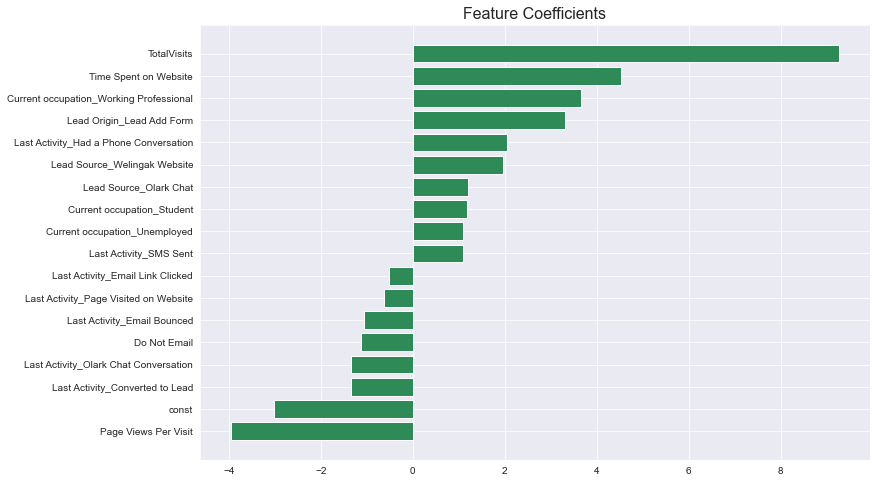

In [142]:
# Plotting a bargraph for the coefficients of the final model
fig1 = plt.figure(figsize = (12,8))
sns.set_style("darkgrid")
df=Imp_features_df.sort_values(by='coefficient')
ax = fig1.add_subplot(1, 1, 1)
ax.barh(df.colname,df.coefficient,color='seagreen')
plt.title('Feature Coefficients',fontdict = {'fontsize':16})
plt.show()

### 13.1: Interpreting the Logistic Regression Model

The equation for multivariate logistic regression is

$  \large \qquad\quad\qquad\quad\qquad\quad\qquad\quad \text{P} = \frac{1}{1 + e^-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... \beta_kX_k) } $

where P is the probability and $ X_1, X_2, $ etc are the variables. <br><br> We can convert this equation to log odds for better interpretability:

$ \large \qquad\quad\qquad\quad\qquad\quad\qquad\quad ln\left ( \frac{P}{1-P} \right ) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... \beta_kX_k  $

<br>The odds of converting  (P/1-P) indicates how much more likely a person is to convert than to not convert into a lead.
<br>For example, if a person has odds of converting = 3, it means that the person is 3 times more likely to convert.
<br>In other words, P(Conversion) = 3*P(No Conversion)<br><br>
<br>Hence the the Equation for our final model will be:

 $ \boxed{ Ln\left(\frac{P}{1-P}\right) =  -3.02 + (9.28 \times \text{TotalVisits}) + (4.52 \times \text{ Time Spent On Website})  - (3.97 \times \text{ Page Views Per Visit}) 
\qquad\qquad \quad\quad + (3.66 \times \text{ Current occupation_Working Professional}) + (3.31 \times \text{ Lead Origin_Lead Add Form}) 
\qquad\qquad \quad\quad +  (2.04 \times \text{ Last Activity_Had a Phone Conversation}) + (1.96 \times \text{ Lead Source_Welingak Website})  
\qquad\qquad \quad\quad - (1.35 \times \text{ Last Activity_Converted to Lead})  - (1.35 \times \text{ Last Activity_Olark Chat Conversation}) 
\qquad\qquad \quad\quad + (1.21 \times \text{ Lead Source_Olark Chat}) + (1.18 \times \text{ Current Occupation_Student})  
\qquad\qquad \quad\quad - (1.12 \times \text{ Do Not Email}) + (1.1 \times \text{ Current occupation_Unemployed}) 
\qquad\qquad \quad\quad + (1.09 \times \text{ Last Activity_SMS Sent})  - (1.06 \times \text{ Last Activity_Email Bounced})  
\qquad\qquad \quad\quad - (0.62 \times \text{ Last Activity_Page Visited on Website})  - (0.51\times \text{ Last Activity_Email Link Clicked}) }$

- For example, a working professional whose last activity was a Phone Conversation will have log odds as follows - <br> <br>
$  Ln\left(\frac{P}{1-P}\right) =  - 3.02 + (9.28\times0) + (4.52\times0)  - (3.97\times0) + (3.66\times1) + (3.31\times0) + (2.04\times1) + (1.96\times0)  - (1.35\times0)  - (1.35\times0) + (1.21\times0) + (1.18\times0)  - (1.12\times0) + (1.1\times0 + 1.09\times0)  - (1.06\times0)  - (0.62\times0)  - (0.51\times0)  = 2.68 $
<br>
Therefore, for this person the odds of conversion is 2.68 times the odds of not converting.

----------------------------------------

## Step 14: Conclusion

-  We have built a logistic regression model that gives a Score between 0 and 100 for each of the leads, based on various parameters like the last activity, time spent by the lead on the website, total number of visits made to the website, the origin of the lead, etc.
- Currently we have a cutoff of 35. That is, leads with a score greater than 35 are considered to be 'Hot leads', whereas leads with a score less than or equal to 35 are not considered as 'Hot Leads'.
- The logistic regression model performs well on both train and test datasets, with the following metrics<br><br>

**Model performance on Train Dataset:**
- Accuracy : 80.71 %
- Sensitivity : 0.794
- Specificity : 0.815
- Precision : 0.726
- Recall:  0.794
- F1 Score:  0.758

<br>**Model performance on Test Dataset:**
- Accuracy : 81.39 %
- Sensitivity : 0.804
- Specificity : 0.821
- Precision : 0.745
- Recall:  0.804
- F1 Score:  0.773

**The five most important features that are indicators of a 'Hot Lead' are:**
1. `TotalVisits` - Positive coefficient of 9.28. This means if a person visits the web page more, he is more likely to convert.
2. `Time Spent on Website` - Positive coefficient of 4.52. This implies that people who spend more time on the website are likely to convert.
3. `Page Views Per Visit` - Negative coefficient of -3.97. This indicates that as the person views more pages, he is less likely to convert.
4. `Current occupation_Working Professional` - Positive coeffiecient of 3.66. This implies that Working Professionals are more likely to convert than non working Professionals
5. `Lead Origin_Lead Add Form` - Positive coefficient of 3.31. This means that the conversion rate is high for the leads that originated via Lead Add Form.

**Next steps for X Education**

- In order to maximize the lead conversion, X education needs to focus on the leads with following patterns:
    - Visiting the website more frequently,
    - Spending more time on the website, but view less pages in each visit,
    - Is a working professional, 
    - Originated via Lead Add Form, 
- Also, it is observed that leads that are sourced through "Welingak Website" are more promising, so this website can be promoted to attract more 'Hot leads'.
- In case X education want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted, they should also consider making calls to leads that have a score slightly less than 35.
- Similarly, if X education wants to limit the number of calls they make, they should consider only making calls to leads that have a score slightly higher than 35.
- Further, it is observed that the leads that are sourced through Olark Chat are likely to convert, but the leads whose last activity is 'Olark Chat Conversation' are not likely to convert. Therefore Olark chat should be used more as a way to source leads, than to nurture them. The leads that are likely to convert prefer other methods of contact, such as phone conversation, which is also indicated by the model.